<img 
    style="position: absolute; 
           left: 60%; 
           top: 0; /* Added to ensure proper positioning */
           height: 900px; 
           width: 40%; /* Maintain the original width */
           object-fit: cover; /* Adjust if necessary */
           clip-path: inset(0px 50px 0px 50px round 10px);" 
    src= "public_html\_data\fig\buildingdamage.svg"
/>
</figure>


<h1 style="width: 60%; color: #EC6842; font-size: 55pt;">
    <Strong>
        IJsselsteinseweg 77 <br>FEA Study
    </Strong>
</h1>

<h2 id="Background"><B>
    Rationale for the project<a class="anchor-link" href="#Background">&#182;</a>
    </B>
</h2>
<p style="text-align: justify; width: 60%; font-weight: normal;">
     This studies case study is the building IJsselsteinseweg 77 in Nieuwegein in the Netherlands, a deatched 2-layer unreinforced masonry structure from 1961 with 2 floors and a cellar which was eventually demolished circa 2015. We can evaluate the state of damage before its demolishing due to a Foundation research report that was commissioned by the owner to Sandra Lobbe Ispectie & Advies, a building consulting firm who carried out the building and foundation investigation on June 2019 and thereafter produced a report documenting the buildings measurements, characteristics, damage state and their own assessment on the necessary course of action or risk of the building integrity due to subsidence effects. The main assessment found that the current capacity provided by the building’s foundation was Insufficient and given the experienced deformations by the building and the damage state of the building, countermeasures should be implemented in a period of 1-5 years following the assessment date. 
</p>

## <strong> X | Imports</strong>

In [1]:
from source.analysis.out import *

import numpy as np
import matplotlib.pyplot as plt

## <strong> 1 | Structure dimensions and measurements</strong>

In [2]:
walls = {
    'Wall 1':{"x": np.array([0, 0, 0]), "y": np.array([0, 3.5, 7]), "z": np.array([0, -72, -152]), 'phi': np.array([1/200,1/200]), 'height': 5250, 'thickness': 27,'area': 390600},
    'Wall 2':{"x": np.array([0, 4.5, 8.9]), "y": np.array([7, 7, 7]), "z": np.array([-152, -163, -188]),  'phi': np.array([1/33,1/50]), 'height': 5250, 'thickness': 27,'area': 464625},
    'Wall 3':{"x": np.array([8.9, 8.9]), "y": np.array([3.6, 7]), "z": np.array([-149, -188]), 'phi': np.array([0,0]), 'height': 5250, 'thickness': 27,'area': 166950},
    'Wall 4':{"x": np.array([8.9, 10.8]), "y": np.array([3.6, 3.6]), "z": np.array([-149,-138]), 'phi': np.array([0,0]), 'height': 2850, 'thickness': 27,'area': 49020},
    'Wall 5':{"x": np.array([10.8, 10.8]), "y": np.array([0, 3.6]), "z": np.array([-104, -138]), 'phi': np.array([1/77,1/67]), 'height': 2850, 'thickness': 27,'area': 96720},
    'Wall 6':{"x": np.array([0, 5.2, 6.4, 8.9, 10.8]), "y": np.array([0, 0, 0, 0, 0]), "z": np.array([0, -42, -55, -75, -104]), 'phi': np.array([1/100,1/100]), 'height': 5000, 'thickness': 27, 'area': 517980},
}

## <strong> 2 | Subsidence aplication method study</strong>

In [11]:
def process(coords, abs_disp, max_rate, rate_multiple):
    coords = coords - min(coords)
    rel_disp = np.insert(np.diff(abs_disp),0,0)

    rel_iter = find_iter(rel_disp, max_rate, rate_multiple)
    abs_iter = find_iter(abs_disp, max_rate, rate_multiple)
    print(rel_iter, abs_iter)
    dydt_abs = abs_disp//abs_iter
    dydt_rel = rel_disp//rel_iter

    dydx_abs = np.gradient(dydt_abs,coords)
    dydx_rel = np.gradient(dydt_rel,coords)
    
    return dydx_abs/dydx_rel

def find_iter(abs_disp, max_rate, rate_multiple = False):
    """
    Calculates the number of iterations based on the absolute displacement, maximum rate, and rate multiple.

    Parameters:
    abs_disp (list): A list of absolute displacements.
    max_rate (float): The maximum rate.
    rate_multiple (float): The rate multiple.

    Returns:
    int: The number of iterations.

    """
    iter = max(abs(abs_disp)) // max_rate
    if rate_multiple:
        iter = iter + rate_multiple - iter % rate_multiple
    return iter

In [12]:
x = walls['Wall 2']['x']
z = walls['Wall 2']['z']
dz = z - z[0]

iter = find_iter(dz,max_rate=0.05)
iter

719.0

## <strong> 3 | Process runs</strong>

### <strong> 3.1 | Process OUT files</strong>

In [ ]:
dir = r'C:\Users\javie\Desktop\Demo'
analyse_models(dir)

### <strong> 3.2 | Process tabulated data</strong>

In [1]:
from source.analysis.tabulated import process_tabulated
from source.main import *

In [2]:
path = r'C:\Users\javie\Desktop\Demo\Wall2_outer_NLA.tb'
df = process_tabulated(path)

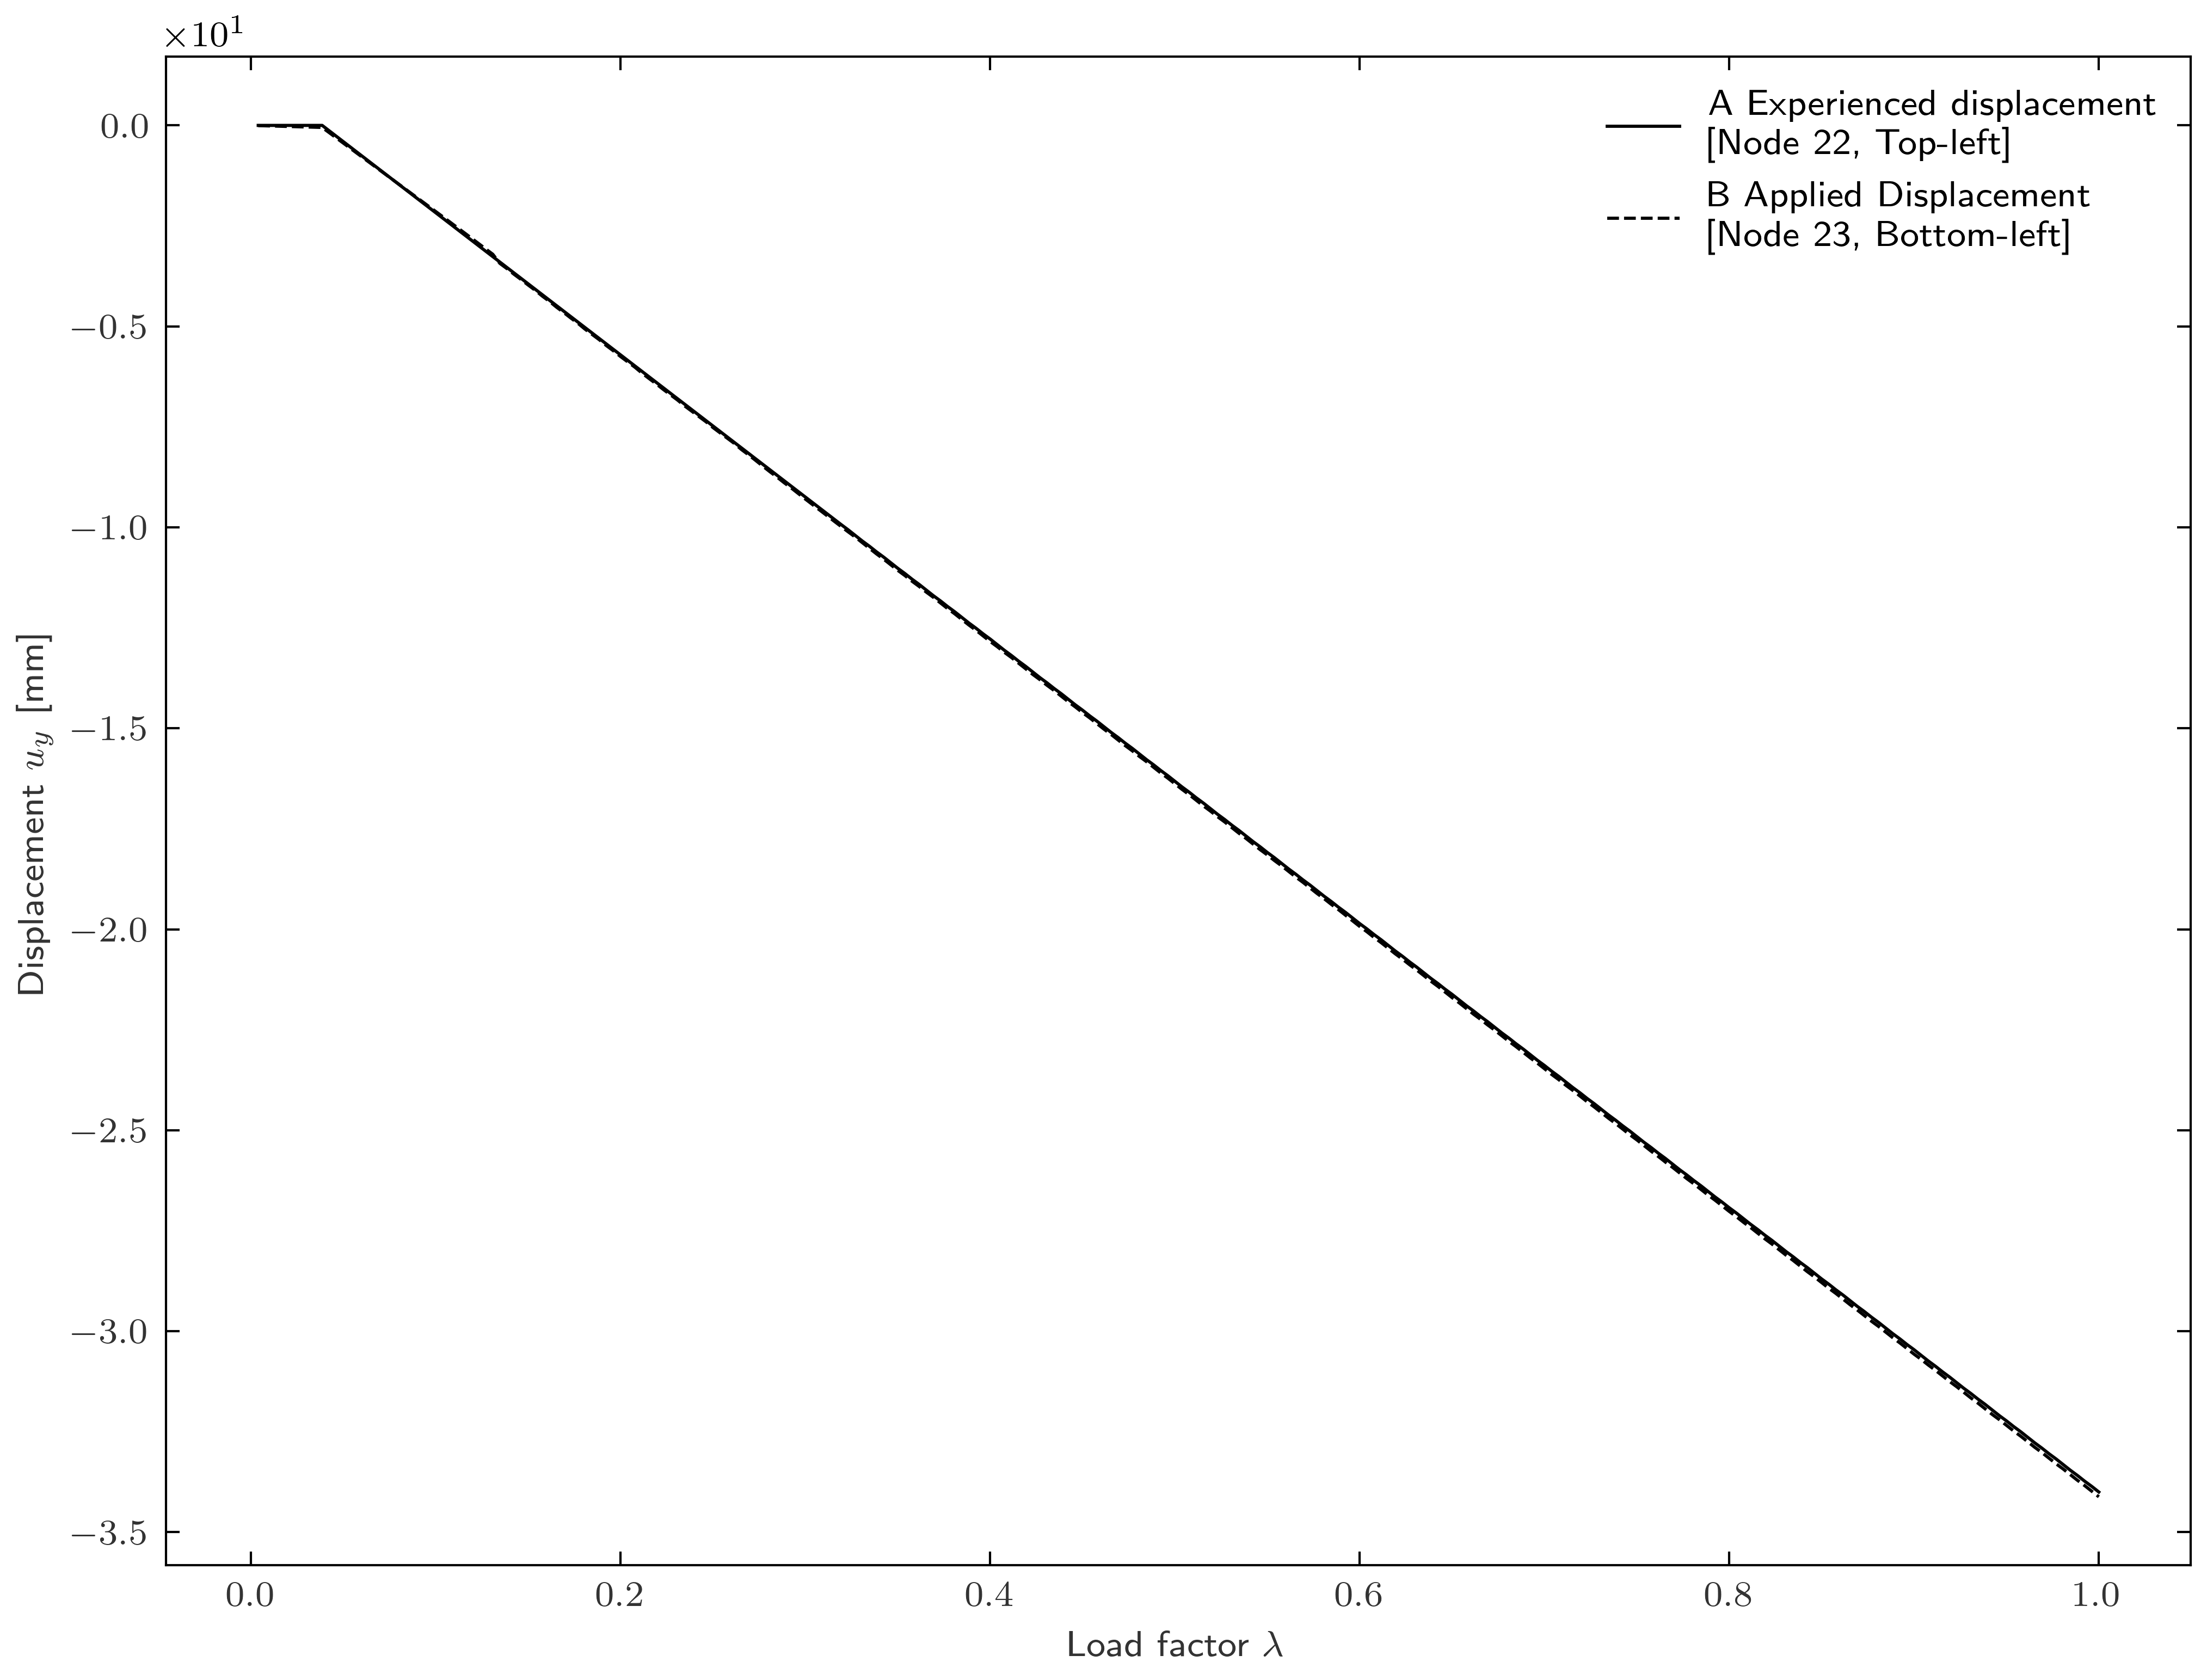

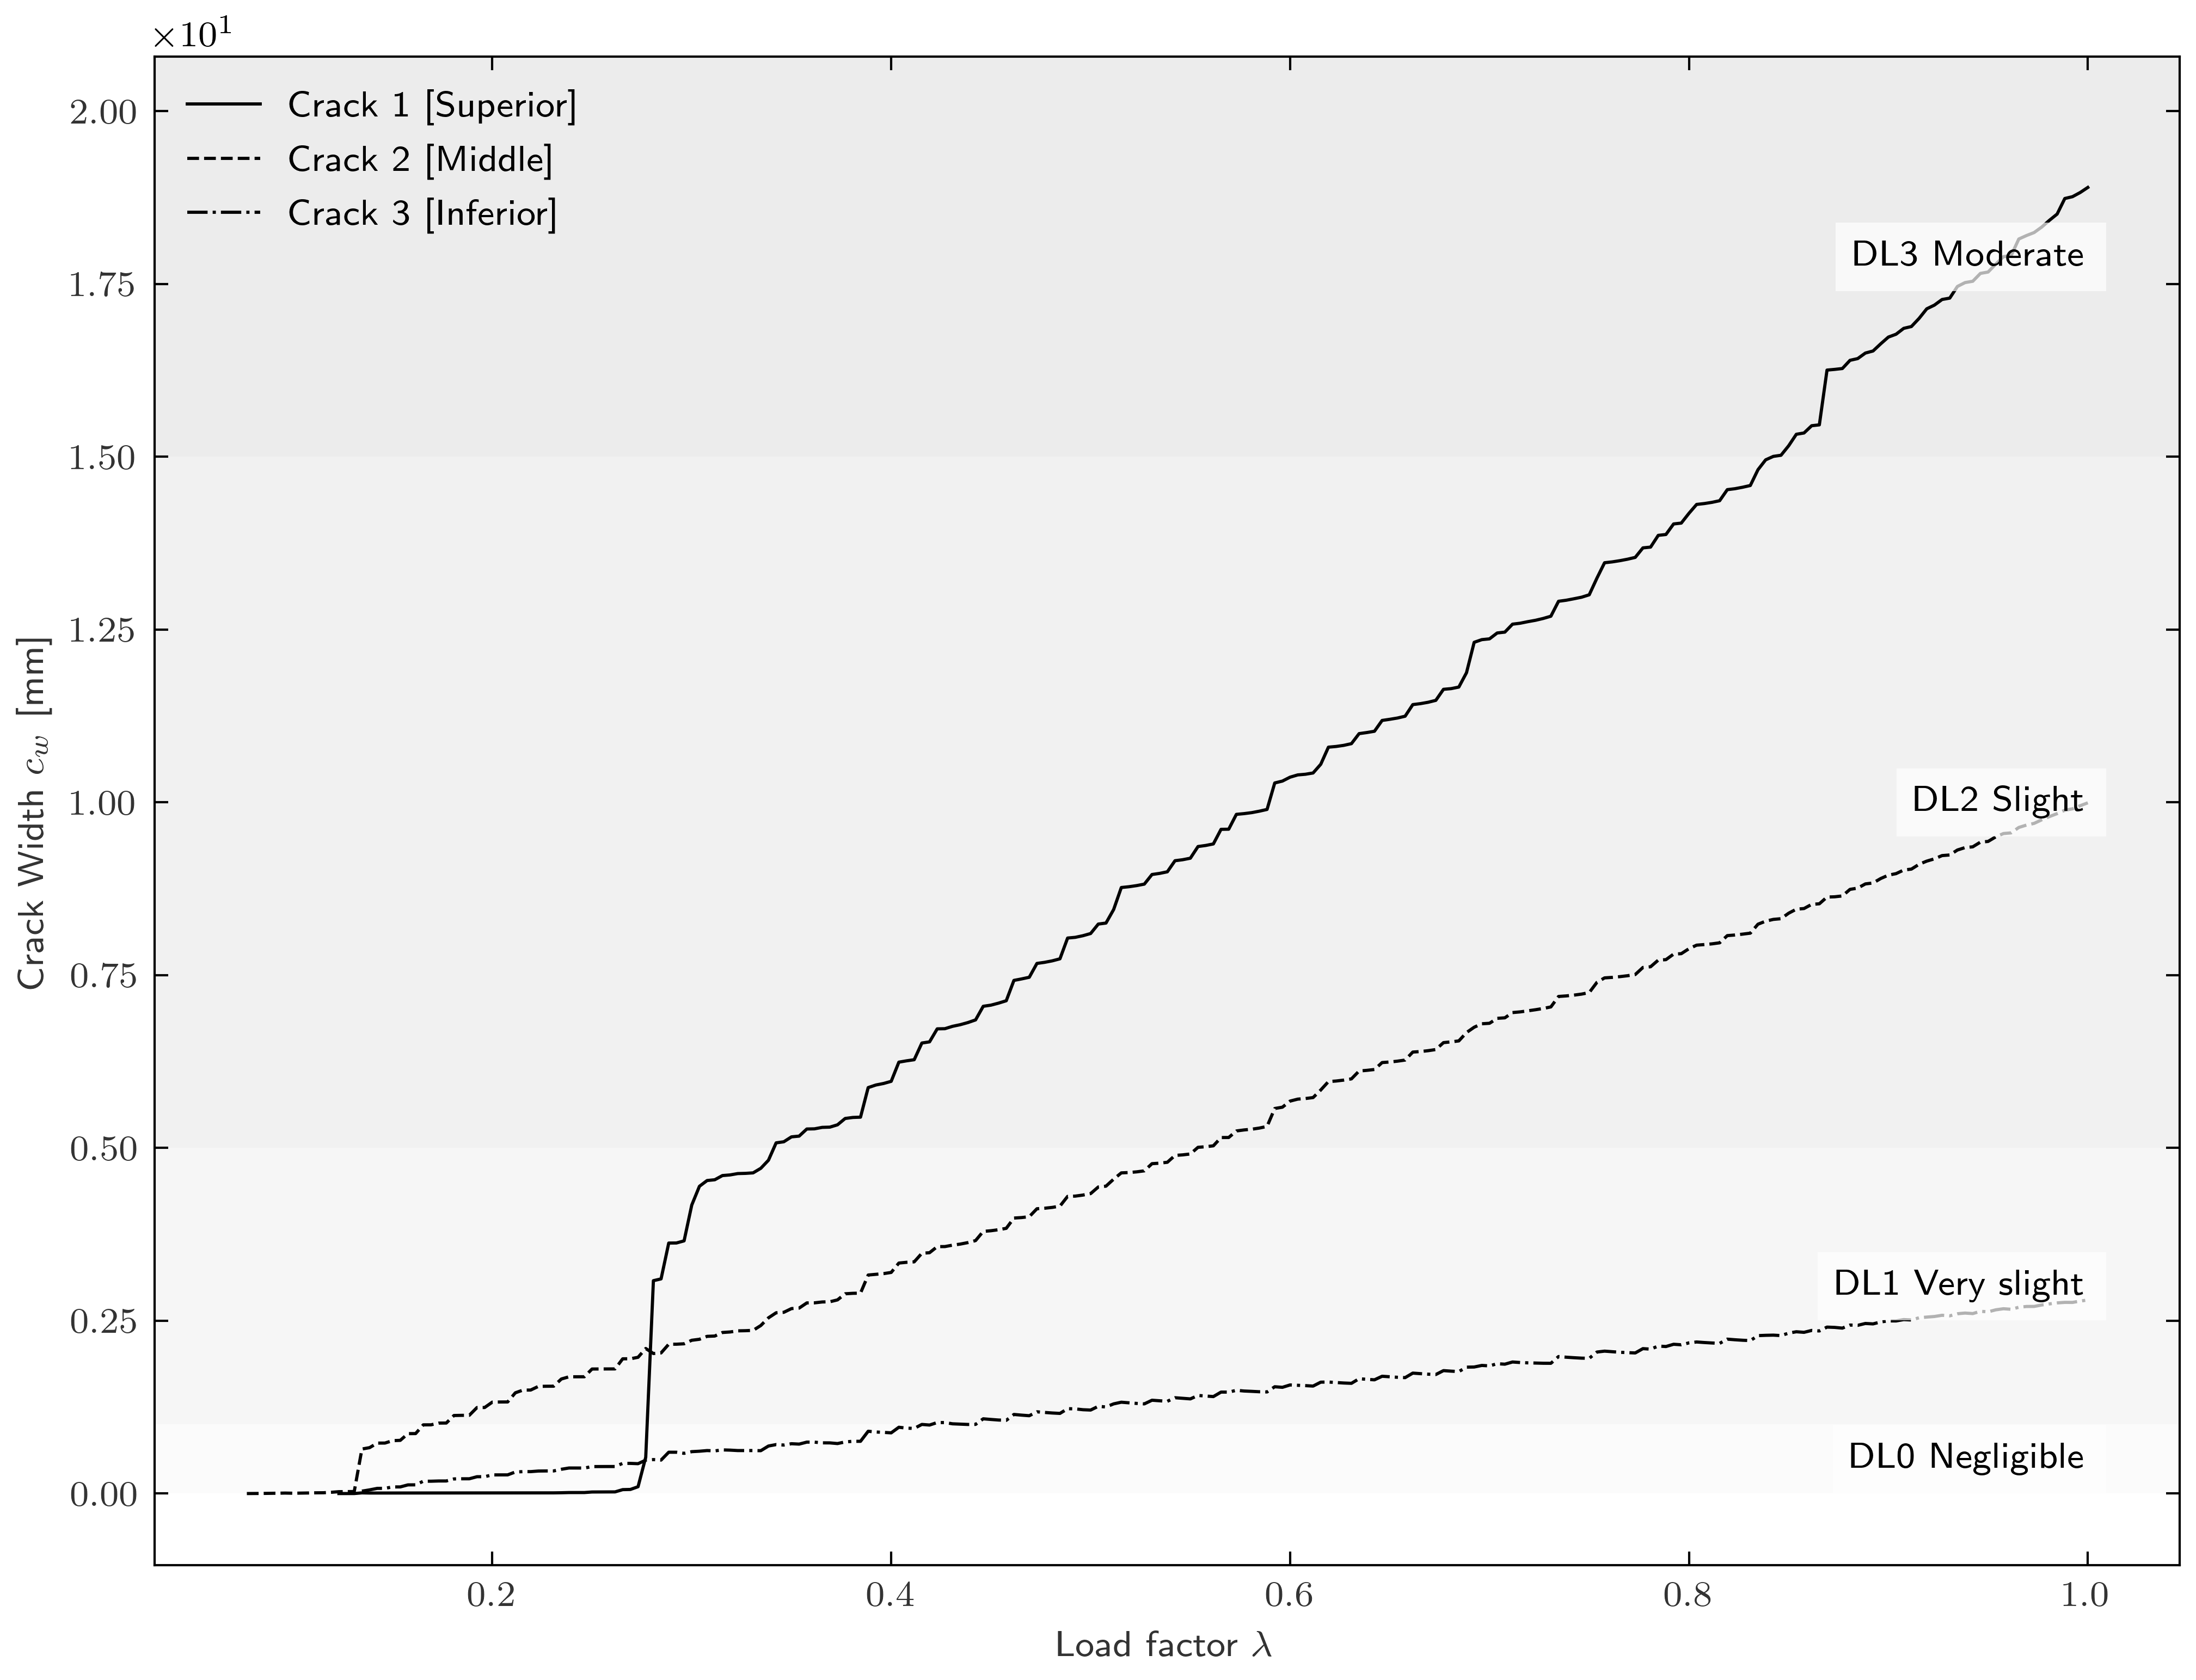

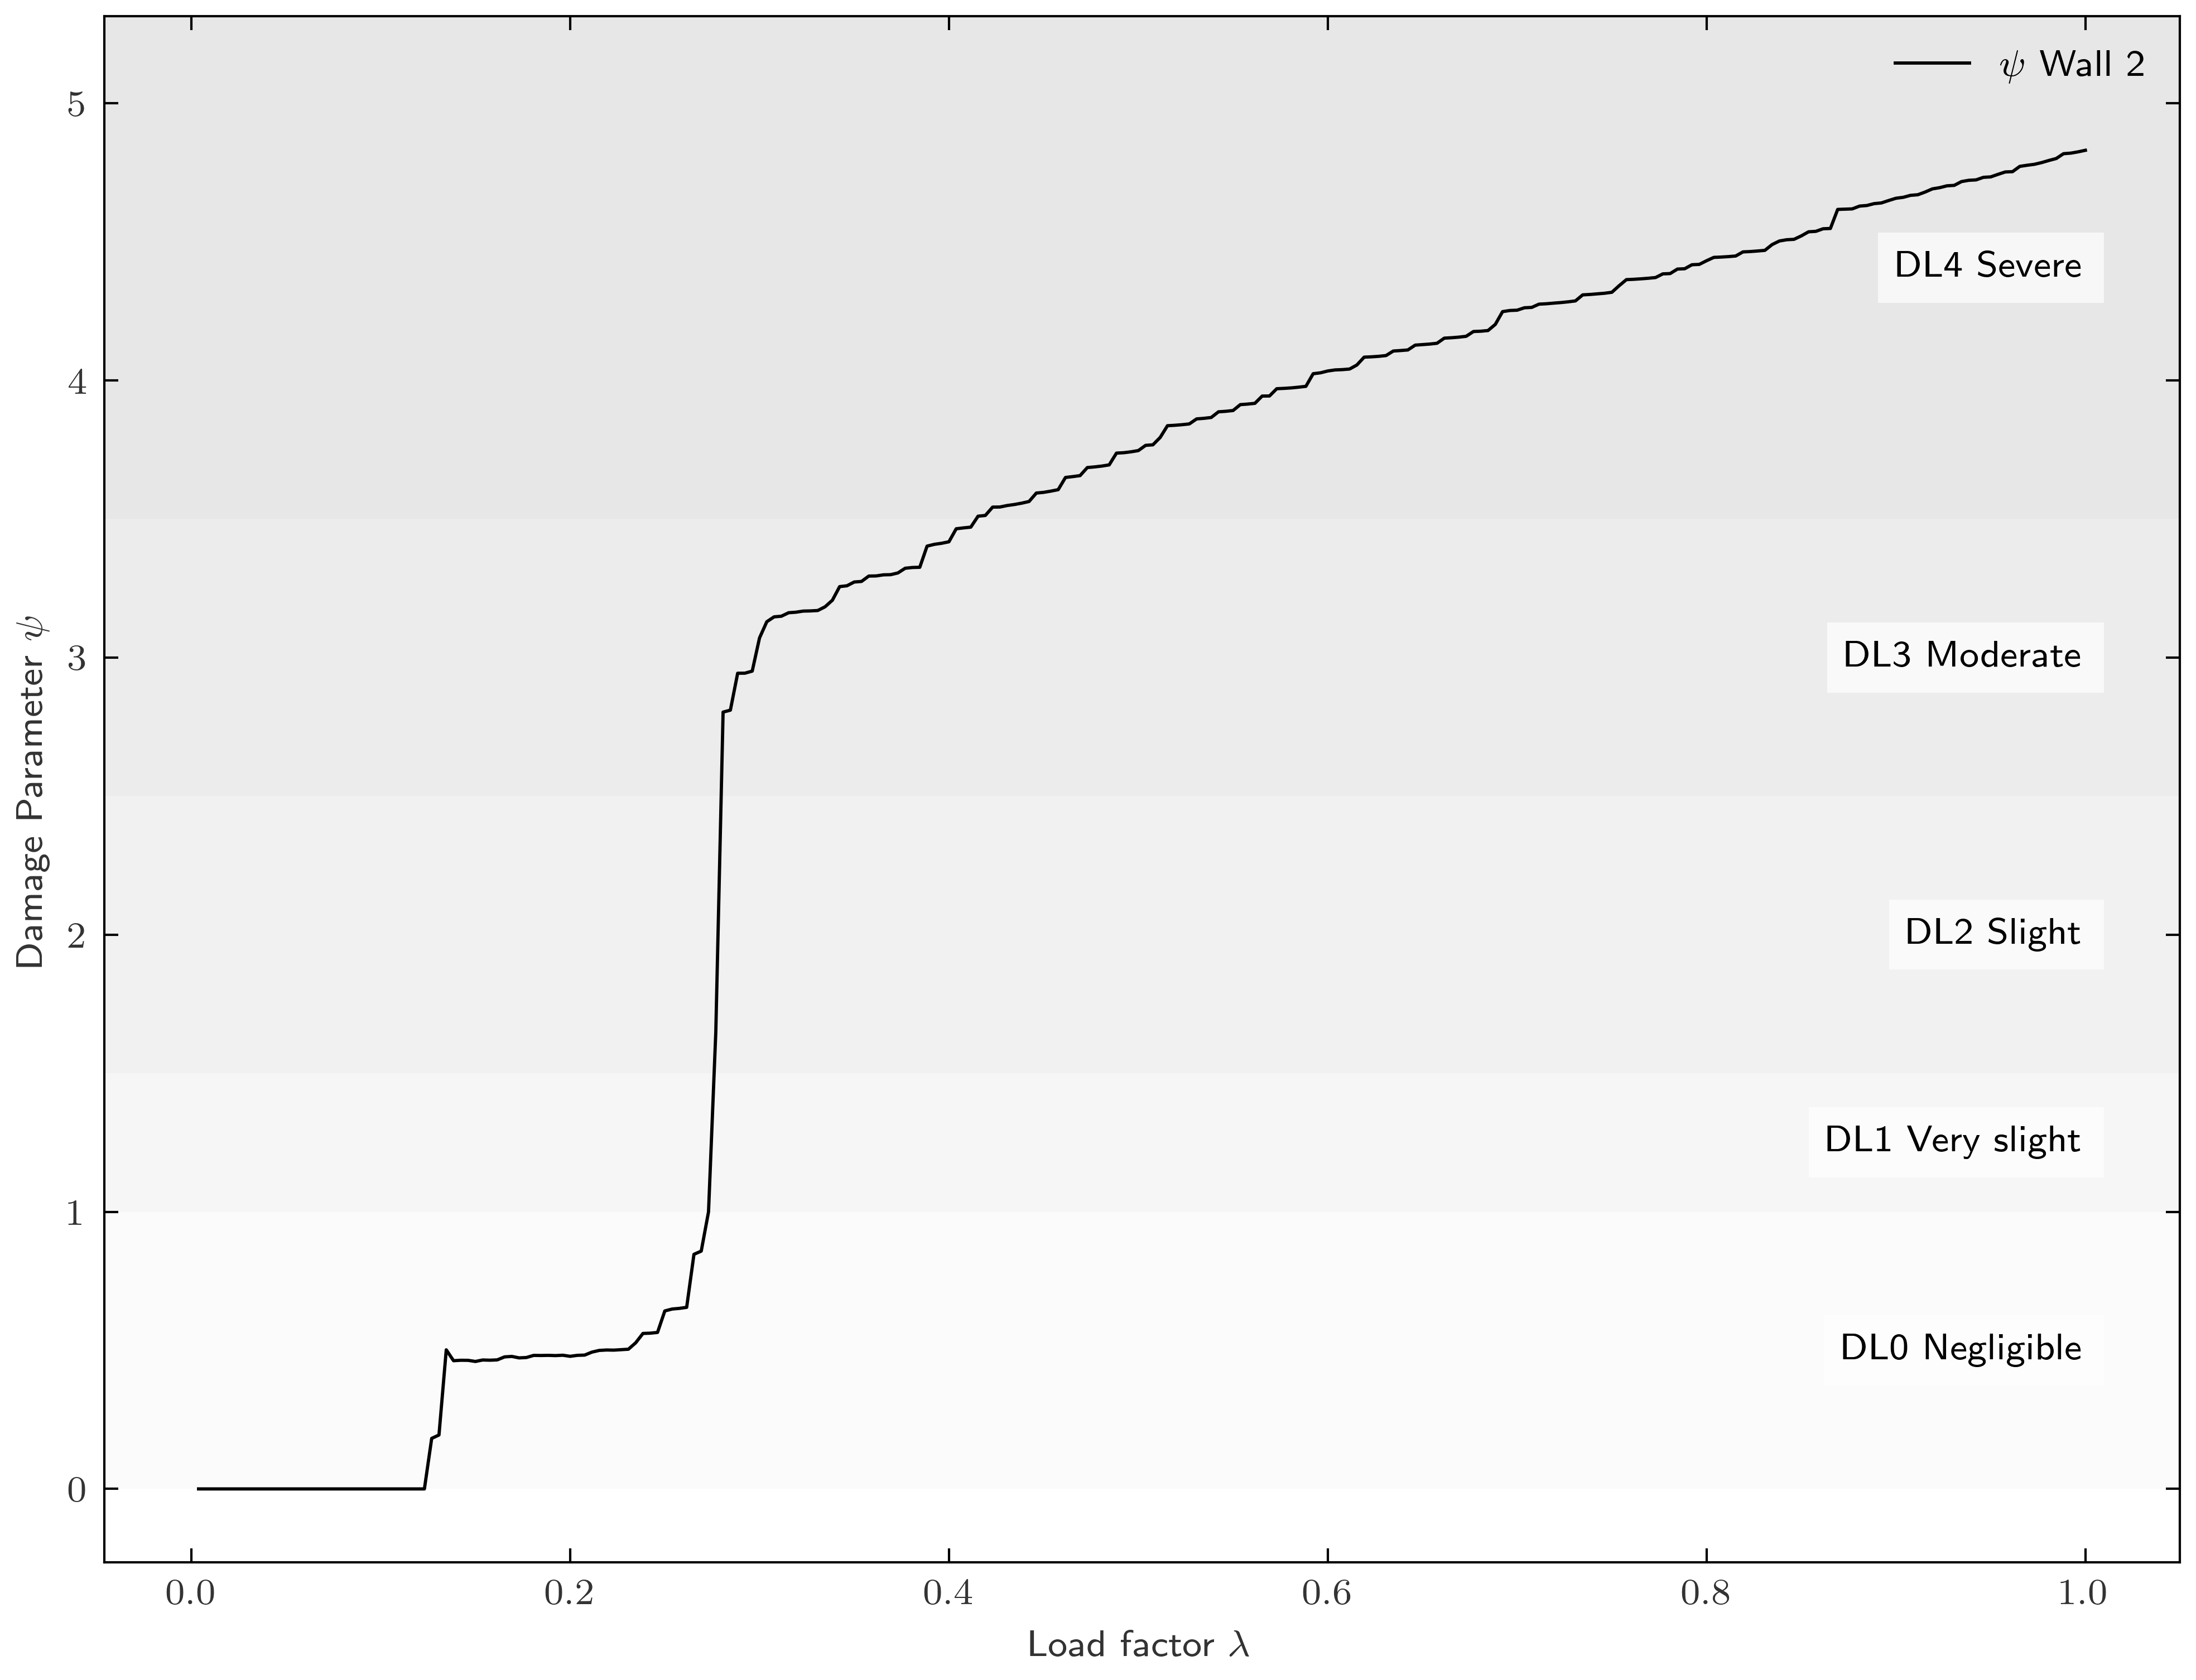

In [3]:
analysis_info = {
    'Displacement': {
        'plot_type': 'Displacement',
        'Node Nr': [22, 23]
    },
    'Crack width': {
        'plot_type': 'Crack Width',
        'EOI': [[177, 179],
                [30, 166, 35, 203, 594, 523, 867, 684, 723],
                [9, 263, 206, 612]]
    },
    'Damage level': { 
        'plot_type': 'Damage level',
        'parameters': {
            'cracks': {
                'EOI': [
                    [177, 179],
                    [30, 166, 35, 203, 594, 523, 867, 684, 723],
                    [9, 263, 206, 612]],
                'element_size': 200,
                },
            'displacement': {
                'Node Nr': [
                    3, 21, 22, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
                    164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
                    178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194]
            }
    }
}}

plot_settings = {
    'Displacement': {
        'traces': ['A Experienced displacement\n[Node 22, Top-left]', 'B Applied Displacement\n[Node 23, Bottom-left]'],
        'labels': ['Load factor $\lambda$', 'Displacement $u_y$ [mm]'],
        'titles': 'Displacements at locations of interest',
        'scientific': True
    },
    'Crack width': {
        'traces': ['Crack 1 [Superior]', 'Crack 2 [Middle]', 'Crack 3 [Inferior]'],
        'labels': ['Load factor $\lambda$', 'Crack Width $c_w$ [mm]'],
        'titles': 'Major crack Width development',
        'scientific': True
    },
    'Damage level': {
        'traces': ['$\psi$ Wall 2'],
        'labels': ['Load factor $\lambda$', 'Damage Parameter $\psi$'],
        'scientific': True
    }
}

data = analyse_tabulated(df, analysis_info)
figures, _ = plotanalysis(data, analysis_info, plot_settings)

In [5]:
data['Damage level']

[     Step nr.      Ecw1       psi
 0           1   0.00000  0.000000
 1           2   0.00000  0.000000
 2           3   0.00000  0.000000
 3           4   0.00000  0.000000
 4           5   0.00000  0.000000
 ..        ...       ...       ...
 255       256  18.51250  4.800313
 256       257  18.73750  4.817741
 257       258  18.76375  4.819765
 258       259  18.82375  4.824384
 259       260  18.89750  4.830046
 
 [260 rows x 3 columns]]

### <strong> 3.3 | Produce individual plots</strong>

1